In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [ ]:
df=pd.read_csv('data/loan-predictionUC.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(df.shape)

(614, 13)


In [ ]:
print(df.info)

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])


In [ ]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])


In [ ]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])


In [ ]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [ ]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [ ]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [ ]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


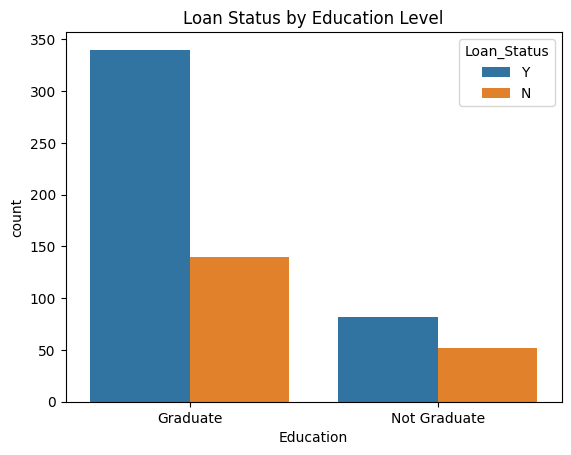

In [ ]:
#visualization bar plot
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education Level')
plt.savefig('results/Loan_Status_by_Education_Level.png')
plt.show()


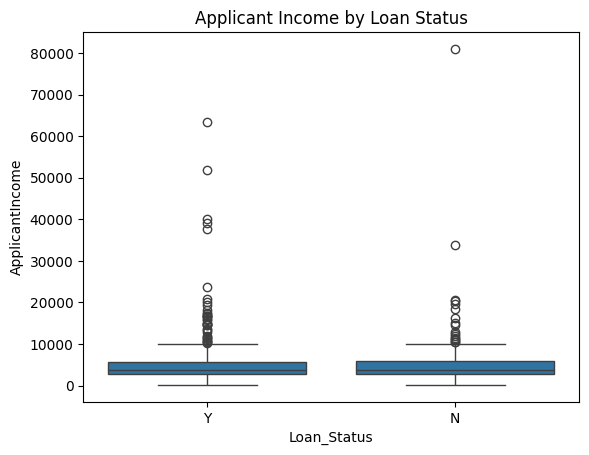

In [ ]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Loan Status')
plt.savefig('results/Applicant_Income_by_Loan_Status.png')
plt.show()#box plot

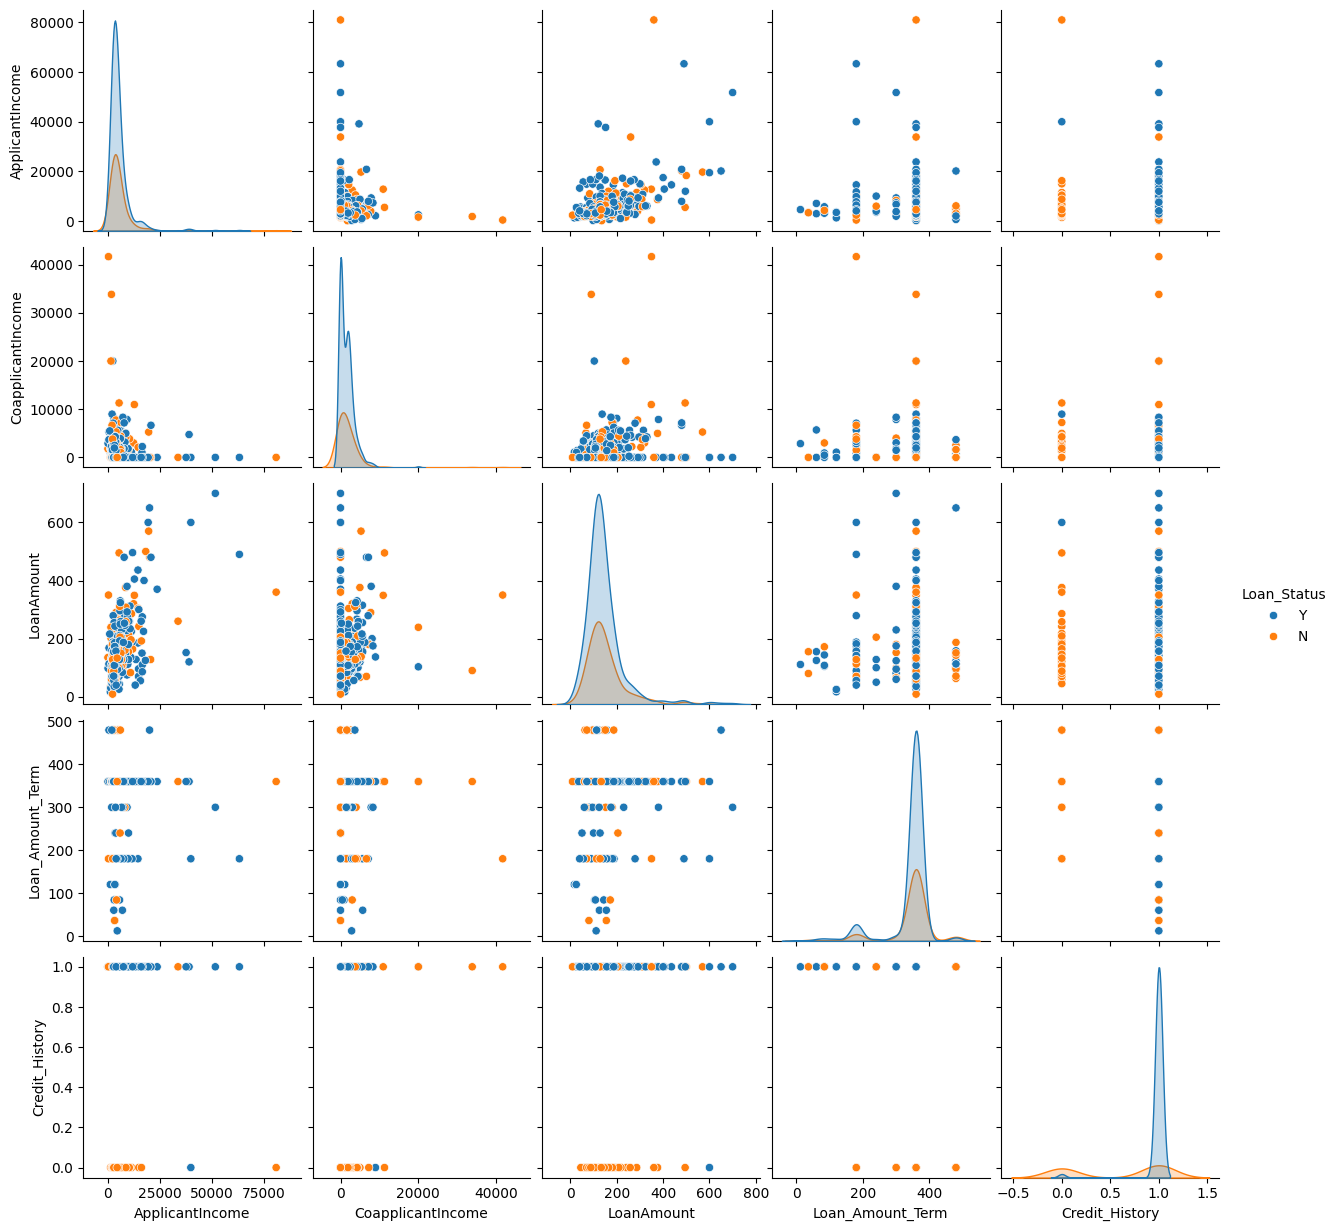

In [ ]:
sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
plt.savefig('results/pair_plot.png')
plt.show()

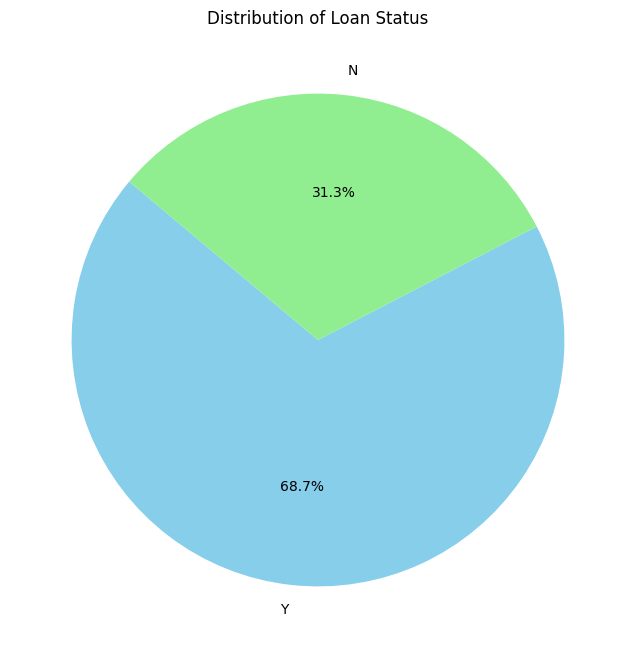

In [ ]:
# Calculate the distribution of loan status
loan_status_counts = df['Loan_Status'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Loan Status')
plt.savefig('results/Distribution_of_loanpc.png')
plt.show()


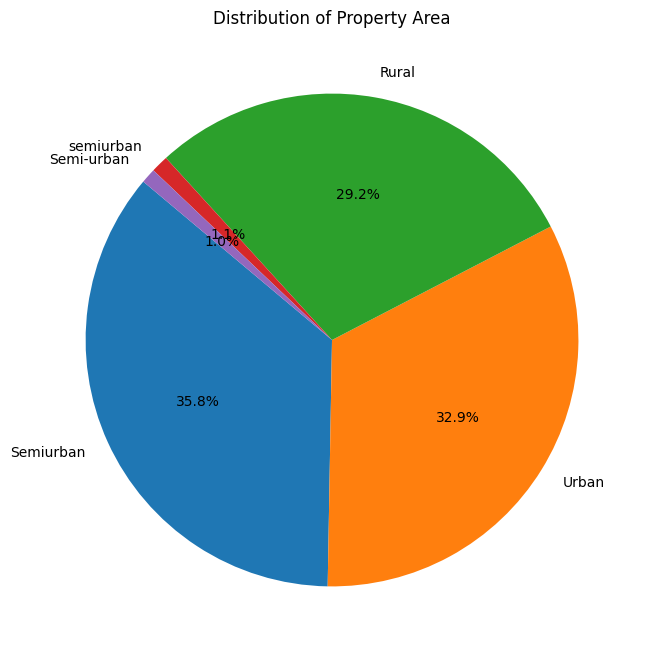

In [ ]:
property_counts = df['Property_Area'].value_counts()

plt.figure(figsize=(8, 8))  # Set the size of the figure
plt.pie(property_counts,     # Data to plot
        labels=property_counts.index,  # Labels for each slice
        autopct='%1.1f%%',   # Display the percentage on the slices
        startangle=140)      # Start the pie chart at a specific angle

plt.title('Distribution of Property Area')
plt.savefig('results/Distribution_of_property_area.png')
plt.show()


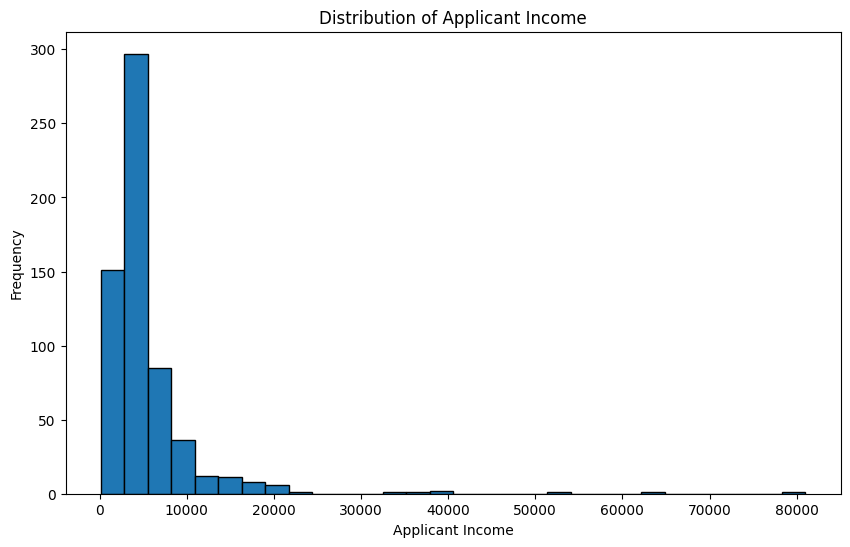

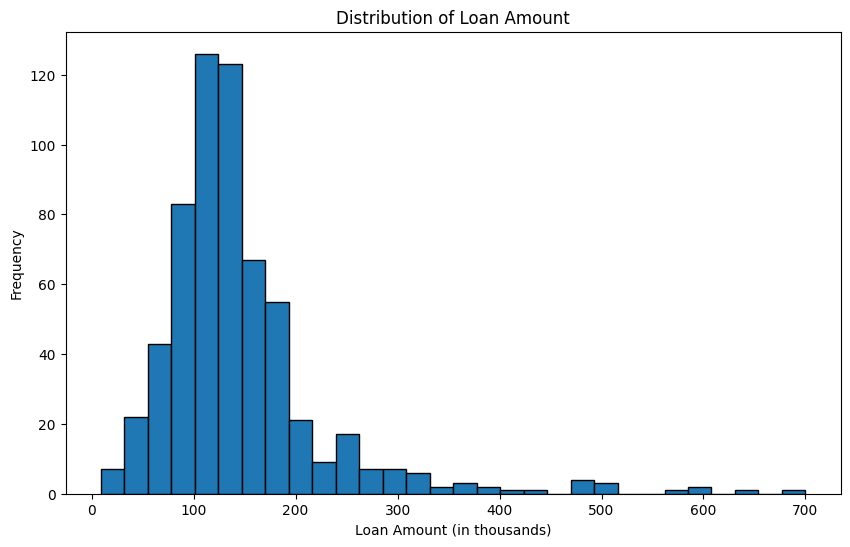

In [ ]:
# Histogram for 'ApplicantIncome'
plt.figure(figsize=(10, 6))
plt.hist(df['ApplicantIncome'], bins=30, edgecolor='black')
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.savefig('results/histogram_appl_inc.png')
plt.show()

# Histogram for 'LoanAmount'
plt.figure(figsize=(10, 6))
plt.hist(df['LoanAmount'].dropna(), bins=30, edgecolor='black')  # dropna to exclude missing values
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount (in thousands)')
plt.ylabel('Frequency')
plt.savefig('results/histogram_loan_amount.png')
plt.show()


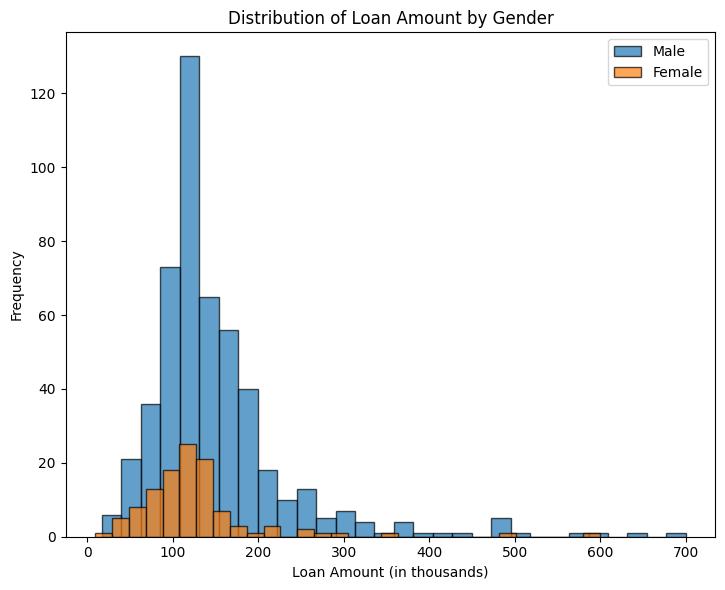

In [ ]:
# Filter the data by gender
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Histogram for 'ApplicantIncome' by gender
plt.figure(figsize=(14, 6))

# Histogram for 'LoanAmount' by gender
plt.subplot(1, 2, 2)
plt.hist(male_data['LoanAmount'].dropna(), bins=30, edgecolor='black', alpha=0.7, label='Male')
plt.hist(female_data['LoanAmount'].dropna(), bins=30, edgecolor='black', alpha=0.7, label='Female')
plt.title('Distribution of Loan Amount by Gender')
plt.xlabel('Loan Amount (in thousands)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
#initializing the model
model = LogisticRegression(max_iter=10000)

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#predict on the the training and test dataset
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#calculating the accuracy
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print(f'Training Accuracy:{train_accuracy:.2f}')
print(f'Test Accuracy:{test_accuracy:.2f}')

Training Accuracy:0.83
Test Accuracy:0.78


In [ ]:
report = classification_report(y_test, y_test_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



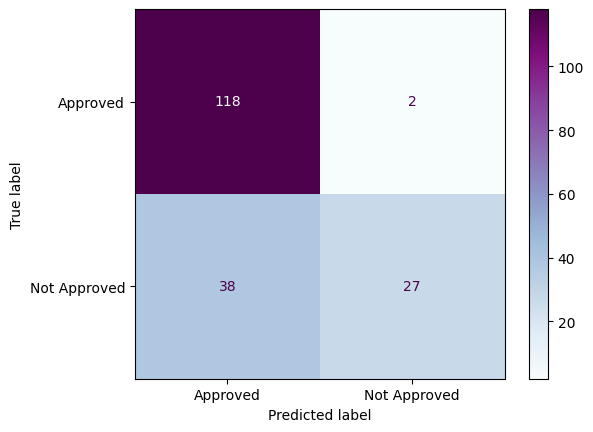

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=['Y', 'N'])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Approved', 'Not Approved'])
disp.plot(cmap='BuPu')
plt.show()


In [ ]:
test_data = df.loc[X_test.index]  # This assumes you have the Loan_ID in `df`

# Save predictions
test_predictions = pd.DataFrame({
    'Loan_ID': test_data['Loan_ID'],  #  to Ensure 'Loan_ID' is present in your DataFrame
    'True_Label': y_test,
    'Prediction': y_test_pred
})

test_predictions.to_csv('results/loan_test_predictions.csv', index=False)



In [ ]:
import os
print(os.getcwd())

import pandas as pd
# Load both datasets
cleaned = pd.read_csv(r"C:\Users\gokul\OneDrive\Desktop\loan_approval_project\results")
predicted = pd.read_csv(r"C:\Users\gokul\OneDrive\Desktop\loan_approval_project\results")
merged = pd.merge(cleaned, predicted, on="Loan_ID", how="left")
merged.to_csv("loan_final_for_tableau.csv", index=False)
print(" Merged dataset created successfully!")


c:\Users\arjun\OneDrive\Desktop\MINOR-PROJECT(Python game)\loan_approval_project
 Merged dataset created successfully!


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best CV score: 0.8204651162790698


In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import datasets
from sklearn import svm

# Load your dataset (replace this with your own dataset)
# Example using iris dataset for demonstration purposes
data = datasets.load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)






In [ ]:
import joblib

joblib.dump(model,'results/loan_prediction_model.pkl')

print("Model Saved sucessfully")


Model Saved sucessfully
